In [1]:
# import libraries
from osgeo import gdal
import matplotlib.pyplot as plt
import numpy as np
import matplotlib as mpl
import numpy.random as rand
%matplotlib inline
from IPython.display import display, clear_output
import time  
from scipy.integrate import odeint

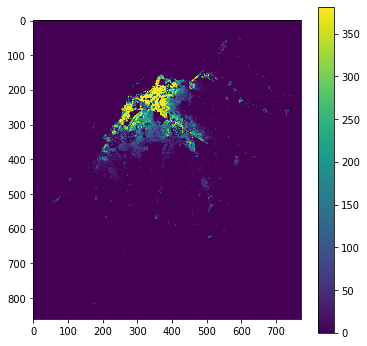

In [2]:
# load the Luanda population density raster data
filepath = r"luanda.tif"

# Open the file
raster = gdal.Open(filepath)

# get the array of raster to manage the cells values
lc = raster.ReadAsArray()

# give value 0 to all the cells that contains values lower than 0
lc[lc<=1] = 0 # no data

# plot the map
plt.figure(figsize=(6, 6))
plt.imshow(lc)
plt.colorbar();

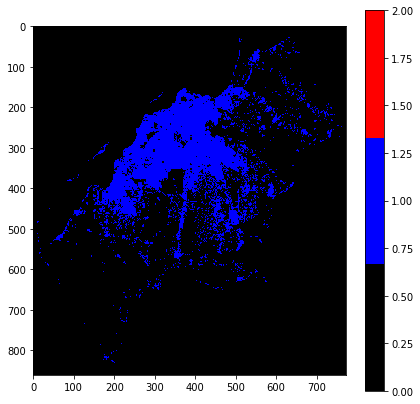

In [3]:
# updating values on the array, so the model works better
where_are_NaNs = np.isnan(lc) # find null values in the array
lc[where_are_NaNs] = 0 # give value 0 to cells with null values
lc[lc>1] = 1 # population
lc[310,380] = 2 # infected people
lc[210,380] = 2 # infected people

cmap = mpl.colors.ListedColormap(['black','blue','red'])
plt.figure(figsize=(7, 7))
plt.imshow(lc, cmap=cmap)
plt.colorbar();

In [4]:
def getNeighborValues(i,j, board):
    neighborhood = [(i-1,j), (i,j-1), (i+1,j), (i,j+1)]
    
    neighbor_values = []
    for neighbor in neighborhood:
        if i <= board.shape[0]-1 and neighbor[0]>=0 and j<=board.shape[1]-1 and neighbor[1]>=0:
            neighbor_values.append(board[neighbor])
    
    return neighbor_values

In [5]:
def infect_next_person(mapa):
    new_mapa = np.zeros_like(mapa)

    for i in range(new_mapa.shape[0]):
        for j in range(new_mapa.shape[1]):
            # if the cell has value equal 2, the cell will keep value 2
            if mapa[i,j]==2:
                new_mapa[i,j]=2
                
            # if the cell has value equal 1, the value will receive 2 if one of the neighbors has value 2
            if mapa[i,j]==1:
                new_mapa[i,j]=1
                neighbors=getNeighborValues(i,j, mapa)
                if 2 in neighbors:
                    new_mapa[i,j]=2
                    
    return new_mapa

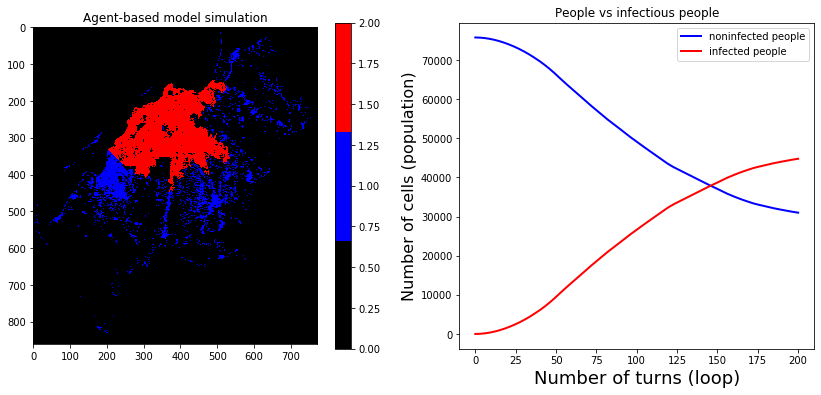

In [6]:
fig = plt.figure(figsize=(14,6))
f_infected = []
f_people = []
day = [0]
lc2 = lc
infected, people = [(lc2==2).sum()], [(lc2==1).sum()]
while True:
    day.append(day[-1]+1)
    
    lc2 = infect_next_person(lc2)
    infected.append((lc2==2).sum())
    people.append((lc2==1).sum())
    
    # plot the graph and map
    plt.subplot(121)
    plt.title('Agent-based model simulation')
    plt.imshow(lc2,interpolation='none', cmap=cmap)
    plt.colorbar();
    plt.subplot(122)
    plt.plot(day, people, 'blue', label='noninfected people', linewidth=2)
    plt.plot(day, infected, 'red',  label='infected people', linewidth=2)
    plt.title('People vs infectious people')
    plt.xlabel('Number of turns (loop)', fontsize=18)
    plt.ylabel('Number of cells (population)', fontsize=16)
    plt.legend(loc='best')
    
    if 200==day[-1] or 150==day[-1] or 100==day[-1] or 50==day[-1] or 5==day[-1]:
        plt.savefig('day'+str(day[-1])+'.png')
        
    clear_output(wait=True)
    display(fig)
    fig.clear()
    
   
    if 200 in day:
        break

plt.close()               